<a href="https://colab.research.google.com/github/pranathi000/ML_libraries/blob/main/Multiple_linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)


100%|██████████| 4.63k/4.63k [00:00<00:00, 7.77MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd

# Read the CSV file from the downloaded path
df = pd.read_csv(path + "/Housing.csv")  # Assuming the file is named Housing.csv

# Display first 5 rows
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_housing_prices_dataset_path = kagglehub.dataset_download('yasserh/housing-prices-dataset')

print('Data source import complete.')


Data source import complete.


Here, I am trying to run multiple linear regression with mulitple variables without using sklearn , and understand the background math steps.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import copy
import math
import os
%matplotlib inline

In [ ]:
# print(os.listdir("./"))
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
df = pd.read_csv(path + "/Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [7]:
df.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [8]:
df.shape


(545, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [12]:
df.duplicated().sum()

0

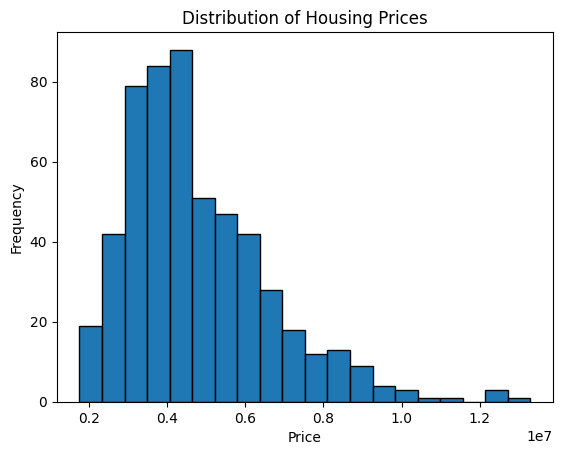

In [13]:
plt.hist(df['price'],bins=20,edgecolor='black')
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel('Frequency')
plt.show()


This code does two things:

1. `int_cols = df.select_dtypes(include=np.number).columns`
   - Selects only integer/numeric columns from the DataFrame
   - Creates a list of column names with numeric data types

2. `sns.heatmap(df[int_cols].corr(), annot=True)`
   - Creates a correlation heatmap of numeric columns
   - `corr()` calculates correlation matrix
   - `annot=True` displays correlation values in each cell
   - Helps visualize relationships between numeric variables

Useful for quickly understanding correlations in data science and statistical analysis.

<Axes: >

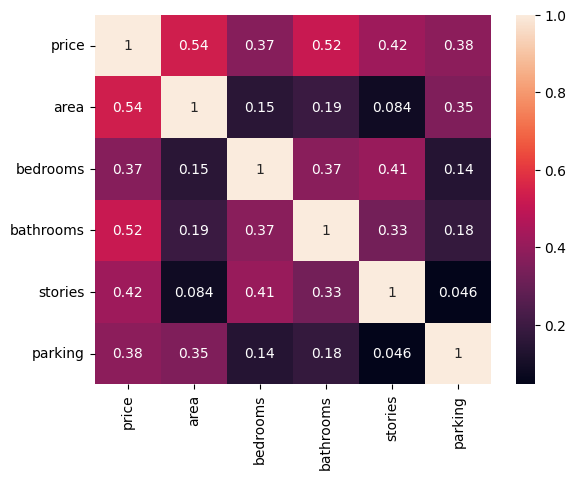

In [14]:
int_cols=df.select_dtypes(include=np.number).columns
sns.heatmap(df[int_cols].corr(),annot=True)

A heatmap is a graphical representation of data where values are depicted by colors. In data analysis:

- Used to visualize correlation between variables
- Each cell's color intensity represents the strength of correlation
- Typically uses color gradient (e.g., blue for negative, red for positive correlations)
- Helps quickly identify patterns and relationships in numeric data

Example: In a correlation heatmap, dark red might show strong positive correlation, dark blue strong negative correlation, and white/light colors show little to no correlation.

---
Copying data prevents unintended modifications to the original DataFrame:

1. Prevents accidental changes to original dataset
2. Creates independent copy for manipulation
3. Protects source data integrity
4. Allows safe transformations without risking original data

Best practice in data analysis to maintain clean, unaltered source data.

In [15]:
data=df.copy


As we discussed in the previous notebook that X should only contain features and y should contain target variable, we are dropping price from X

In [16]:
X=df.drop('price',axis=1)
y=df['price']
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [17]:
X = pd.get_dummies(X,drop_first=True)
# even tho sklearn can train the data directly , we still have to convet
# so our math operation works.pd.get_dummie()change categories data into
# one hot encoding . drop_first lower the data duplication .
X = X.astype(int)

X=X.to_numpy()
y=y.to_numpy()





1. `pd.get_dummies(X, drop_first=True)`:
   - Converts categorical variables to one-hot encoded columns
   - `drop_first=True` removes first category to avoid multicollinearity
   - Prevents redundant binary encoding

2. `X = X.astype(int)`:
   - Converts data to integer type
   - Ensures numeric compatibility for machine learning algorithms

3. `X.to_numpy()` and `y.to_numpy()`:
   - Converts pandas DataFrame/Series to NumPy arrays
   - Many machine learning libraries (like scikit-learn) prefer NumPy arrays
   - Improves computational efficiency
   - Standardizes data format for model training

These steps prepare categorical data for machine learning models by encoding and converting to a standard numeric format.

In [18]:
print(X[:10])

[[ 7420     4     2     3     2     1     0     0     0     1     1     0
      0]
 [ 8960     4     4     4     3     1     0     0     0     1     0     0
      0]
 [ 9960     3     2     2     2     1     0     1     0     0     1     1
      0]
 [ 7500     4     2     2     3     1     0     1     0     1     1     0
      0]
 [ 7420     4     1     2     2     1     1     1     0     1     0     0
      0]
 [ 7500     3     3     1     2     1     0     1     0     1     1     1
      0]
 [ 8580     4     3     4     2     1     0     0     0     1     1     1
      0]
 [16200     5     3     2     0     1     0     0     0     0     0     0
      1]
 [ 8100     4     1     2     2     1     1     1     0     1     1     0
      0]
 [ 5750     3     2     4     1     1     1     0     0     1     1     0
      1]]


`print(X[:10])` displays the first 10 rows of the data matrix (NumPy array).

Key purposes:
- Quick data preview
- Verify data transformation
- Check one-hot encoding result
- Validate preprocessing steps
- Confirm data looks as expected before model training

Essentially a diagnostic print to inspect data transformation output.

In [19]:
def zscore_normalize_features(X):
    ## feature scaling all features ,without it we might faced memory overflow.
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma

    return X_norm

This function implements Z-score normalization (standardization):

1. Calculates mean (`mu`) of each feature across all samples
2. Calculates standard deviation (`sigma`) of each feature
3. Normalizes features by subtracting mean and dividing by standard deviation
4. Transforms data to have:
   - Mean of 0
   - Standard deviation of 1
   - Consistent scale across features

Benefits:
- Prevents feature dominance
- Mitigates memory overflow
- Improves machine learning algorithm performance
- Helps algorithms converge faster

In [20]:
print(X[:10])

X=zscore_normalize_features(X)
print(X[:10])


[[ 7420     4     2     3     2     1     0     0     0     1     1     0
      0]
 [ 8960     4     4     4     3     1     0     0     0     1     0     0
      0]
 [ 9960     3     2     2     2     1     0     1     0     0     1     1
      0]
 [ 7500     4     2     2     3     1     0     1     0     1     1     0
      0]
 [ 7420     4     1     2     2     1     1     1     0     1     0     0
      0]
 [ 7500     3     3     1     2     1     0     1     0     1     1     1
      0]
 [ 8580     4     3     4     2     1     0     0     0     1     1     1
      0]
 [16200     5     3     2     0     1     0     0     0     0     0     0
      1]
 [ 8100     4     1     2     2     1     1     1     0     1     1     0
      0]
 [ 5750     3     2     4     1     1     1     0     0     1     1     0
      1]]
[[ 1.04672629  1.40341936  1.42181174  1.37821692  1.51769249  0.40562287
  -0.46531479 -0.73453933 -0.2192645   1.4726183   1.80494113 -0.84488844
  -0.6964292 ]
 [ 1.7

---
This demonstrates Z-score normalization's effect:

1. First `print(X[:10])`: Shows original data values

2. `X = zscore_normalize_features(X)`: Applies Z-score normalization
   - Shifts data to have zero mean
   - Scales to standard deviation of 1

3. Second `print(X[:10])`: Displays normalized data
   - Values now centered around 0
   - Comparable scale across features
   - Helps machine learning algorithms perform more consistently

Purpose: Verify data transformation and confirm normalization worked correctly.

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# Reset indices ,always try to check the shape of data .
print(f"shape of X_train{X_train.shape}, shape of y train{y_train.shape}")
print(f"shape of X_test{X_test.shape}, shape of y_test{y_test.shape}")


shape of X_train(436, 13), shape of y train(436,)
shape of X_test(109, 13), shape of y_test(109,)


This code snippet splits data into training and testing sets:

1. `train_test_split()`:
   - Randomly divides data into training and testing sets
   - `test_size=0.2` means 20% for testing, 80% for training
   - Crucial for model validation

2. Print statements check data shapes:
   - Verify correct splitting
   - Confirm data dimensions
   - Ensure consistent data partitioning

Helps validate data preparation before model training.

In [22]:
def compute_cost(x,y,w,b):
    ## computing the cost ,beware we are looping through all the observation , not features.
    m=x.shape[0]## 436 not 13

    cost = 0.0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)

    return cost

Linear Regression Cost Function Formula:

J(w,b) = (1/2m) * Σ(f_wb(x^(i)) - y^(i))²

Where:
- m = number of training examples
- f_wb(x^(i)) = predicted value = wx + b
- y^(i)) = actual value
- Σ = sum over all training examples
- 1/2m:
  - Divides by m to get average
  - 1/2 makes derivative calculation simpler during gradient descent
  - Prevents doubling of gradient values

Key points:
- Measures prediction error
- Squared differences penalize larger errors more
- Averaging prevents scale dependency
- Lower cost means better model fit

In [23]:
n=X_train.shape[1]
init_w=np.zeros(n)## we will get the number of features and create initilal_w.
init_b=0
total_cost=compute_cost(X_train,y_train,init_w,init_b)
print(total_cost)

12877266551294.266


This code initializes linear regression parameters:

1. `n = X_train.shape[1]`: Get number of features
2. `init_w = np.zeros(n)`: Create initial weights (all zeros)
3. `init_b = 0`: Set initial bias to zero
4. `total_cost = compute_cost()`: Calculate initial cost
5. `print(total_cost)`: Display initial cost

Purpose:
- Set up starting point for model
- Establish baseline cost before optimization
- Prepare for gradient descent

Typical first step in training a linear regression model.

In [24]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    ## computing the gradient ,beware we are looping through all the observation , not features.

    temp_dj_dw=0
    temp_dj_db=0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        dj_db_i=f_wb_i-y[i]
        dj_dw_i=(f_wb_i-y[i])*x[i]
        temp_dj_db+=dj_db_i
        temp_dj_dw+=dj_dw_i

    dj_db=temp_dj_db/m
    dj_dw=temp_dj_dw/m

    return dj_db,dj_dw


Gradient Computation in Linear Regression:

Purpose: Calculate derivatives for weights (w) and bias (b)

Key steps:
- Loop through all training examples
- Compute prediction error for each sample
- Calculate partial derivatives for weights and bias
- Average derivatives across all samples

What it does:
- Determines direction to minimize cost function
- Prepares for gradient descent optimization
- Helps adjust model parameters to reduce prediction error

Essentially: Finding the steepest descent path to improve model performance.

In [25]:
gradient=compute_gradient(X_train,y_train,init_w,init_b)
print(gradient)
X_train.shape[1]

(-4719114.541284404, array([-1104277.15180413,  -627325.78097831,  -954710.69437647,
        -643335.39154423,  -698432.0191567 ,  -394410.99347946,
        -523807.21129407,  -320569.2013547 ,  -145413.03121358,
        -854396.35290323,  -448294.79312801,   -23926.71633285,
         434874.11250027]))


13

Breaking this down:

1. `gradient = compute_gradient(X_train, y_train, init_w, init_b)`:
   - Computes initial gradients for model parameters
   - Shows how far/direction to move weights and bias

2. `print(gradient)`:
   - Displays computed gradient values
   - Helps understand initial optimization direction

3. `X_train.shape[1]`:
   - Returns number of features
   - Confirms feature dimensions

Purpose: Prepare for gradient descent by calculating initial parameter adjustments.

In [27]:
def gradient_descent(x,y,w_in,b_in,compute_cost,compute_gradient,alpha,iterations):
    # Initialize list to track cost at each iteration
    J_history = []

    # Create deep copy of weights to avoid modifying original input
    w = copy.deepcopy(w_in)

    # Set initial bias
    b = b_in

    # Iterate through specified number of optimization steps
    for i in range(iterations):
        # Compute gradients for weights and bias
        dj_db, dj_dw = compute_gradient(x, y, w, b)

        # Update weights by moving in opposite gradient direction
        # alpha controls learning rate (step size)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        # Limit memory usage by tracking cost for first 100,000 iterations
        if i < 100000:
            # Calculate current model cost
            cost = compute_cost(x, y, w, b)
            # Store cost in history for tracking learning progress
            J_history.append(cost)

        # Print cost every 10% of iterations for monitoring
        if i % math.ceil(iterations/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    # Return optimized weights, bias, and cost history
    return w, b, J_history

### difference between def compute_gradient and def gradient_descent?

Comparison:

`compute_gradient()`:
- Calculates individual derivatives
- Computes error for each training example
- Returns gradient values
- Single calculation step

`gradient_descent()`:
- Complete optimization algorithm
- Iterates multiple times
- Updates model parameters
- Tracks learning progress
- Manages entire training process

Analogy:
- `compute_gradient()` is like measuring distance
- `gradient_descent()` is like using those measurements to navigate a path

In [28]:
iterations=10000
alpha = 0.01
w_final,b_final,J_hist=gradient_descent(X_train,y_train,init_w,init_b,compute_cost,compute_gradient,alpha,iterations)


Iteration    0: Cost 12605272443731.08
Iteration 1000: Cost 561668152024.65
Iteration 2000: Cost 561665649088.80
Iteration 3000: Cost 561665648313.12
Iteration 4000: Cost 561665648312.85
Iteration 5000: Cost 561665648312.85
Iteration 6000: Cost 561665648312.85
Iteration 7000: Cost 561665648312.85
Iteration 8000: Cost 561665648312.85
Iteration 9000: Cost 561665648312.85


This code runs gradient descent:

1. Sets 10,000 iterations
2. Learning rate (alpha) = 0.01
3. Trains model on training data
4. Finds optimal weights and bias
5. Stores cost history

Outputs:
- `w_final`: Optimized weights
- `b_final`: Optimized bias
- `J_hist`: Cost progression during training

In [29]:
print(w_final,b_final)

[ 545808.1813712    74466.67825908  473556.09034527  374473.9893004
  207920.8026979   138596.72899264  153299.90121163  139791.7740064
  210803.85419629  402557.40196157  286284.28208332  -30140.48974334
 -188061.4844697 ] 4742361.684446243


Prints final model parameters:
- `w_final`: Optimized feature weights
- `b_final`: Final bias term

Helps verify:
- Model's learned coefficients
- Parameter values after training
- Understand how features impact predictions

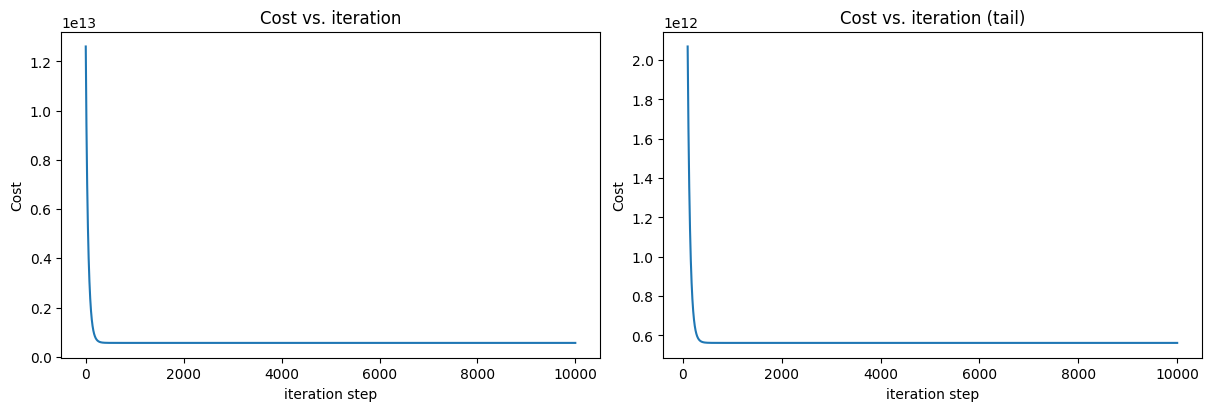

In [30]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

Key differences:

First graph (left):
- Shows entire cost history
- Includes initial high-cost iterations
- Displays full learning trajectory

Second graph (right):
- Starts from 100th iteration
- Zooms into later, more stable learning phase
- Excludes initial high-variance iterations
- Provides closer view of convergence

Purpose: Reveal learning process details at different stages.

In [31]:
def R_squared(x,y,w,b):
    # Get number of training examples
    m = x.shape[0]

    # Initialize error tracking variables
    sqr_error = 0
    mean_sqr_error = 0

    # Calculate mean of actual values
    mu = np.mean(y, axis=0)

    # Loop through all training examples
    for i in range(m):
        # Predict value using current model parameters
        y_pred = np.dot(x[i], w) + b

        # Calculate squared error between actual and predicted
        temp_sqr_error = (y[i] - y_pred)**2
        sqr_error += temp_sqr_error

        # Calculate squared error from mean prediction
        temp_mean_sqr_error = (y[i] - mu)**2
        mean_sqr_error += temp_mean_sqr_error

    # Calculate R-squared (coefficient of determination)
    R_squared = 1 - (sqr_error / mean_sqr_error)

    return R_squared


Purpose:
- Measures model's predictive performance
- Indicates how well model explains variance in data
- Ranges from 0 to 1
- Higher value (closer to 1) means better model fit

Interpretation:
- 1.0: Perfect prediction
- 0.0: Model predicts no better than mean
- Negative: Worse than mean prediction

In [32]:

accuracy=R_squared(X_test,y_test,w_final,b_final)
print(accuracy)

0.6869038568775482


This calculates model's accuracy on test data:

1. Uses R-squared metric
2. Evaluates model performance
3. Applies final weights/bias to test set
4. Measures how well model explains variance in unseen data

Measures predictive power: higher value (closer to 1) indicates better model fit.

In [33]:
y_pred=np.dot(X_test[1],w_final)+b_final
print(y_pred,y_test[1])

7387857.148212211 6440000



1. Predicts single test sample value
2. Compares predicted vs actual value
3. Validates model's prediction accuracy
4. Checks how close prediction is to true value

Helps verify model's performance on individual data points.

In [35]:
# Import necessary sklearn modules for regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression model instance
model = LinearRegression()

# Train model on training data
model.fit(X_train, y_train)

# Generate predictions for test data
y_pred = model.predict(X_test)

# Calculate R-squared score (model's performance metric)
score = model.score(X_test, y_test)
print(score)

# Calculate mean squared error (average prediction error)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared using alternative method
r2 = r2_score(y_test, y_pred)
print(r2)

0.6869038568775516
0.6869038568775516


Sklearn Linear Regression:

1. Creates standard linear regression model
2. Trains on training data
3. Predicts on test data
4. Calculates performance metrics:
   - `model.score()`: R-squared
   - `mean_squared_error()`: Average prediction error
   - `r2_score()`: Coefficient of determination

Compares to previous manual implementation, uses sklearn's built-in functions.

---
---
Predicts outcome using multiple independent variables
Extends simple linear regression to multiple features


Handles complex relationships
Captures interactions between variables
Provides more nuanced predictions

Use Cases:

Real estate price prediction
Sales forecasting
Economic modeling
Scientific research

Advantages:

More accurate than single-feature models
Captures complex data patterns
Helps understand feature impacts